In [42]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('Titanic_train.csv')

print(df.shape)

df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
# Drop the column 'Cabin'
df.drop(['Cabin'],axis=1,inplace=True)

print(df.shape)

(891, 11)


In [46]:
# Fill Age missing value as mean of it
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill Missing categorical values as most often appearing value using mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [47]:
# Get all the categorical columns
categorical_Columns = df.select_dtypes(exclude=[np.number]).columns

print(categorical_Columns)

# Lets Drop 'Name' and 'Ticket' COlumns

df.drop(['Name','Ticket'],axis=1,inplace=True)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [48]:
# handle categorical Varibales : Embarked

get_dummies_Embarked =  pd.get_dummies(df['Embarked'],prefix='Embarked')
df = pd.concat([df,get_dummies_Embarked],axis=1)
df.drop(['Embarked'],axis=1,inplace=True)

In [49]:
# handle categorical Varibales : PClass

get_dummies_Pclass =  pd.get_dummies(df['Pclass'],prefix='Pclass')
df = pd.concat([df,get_dummies_Pclass],axis=1)
df.drop(['Pclass'],axis=1,inplace=True)

In [50]:
# handle categorical Varibales : Sex

get_dummies_Sex =  pd.get_dummies(df['Sex'],prefix='Pclass')
df = pd.concat([df,get_dummies_Sex],axis=1)
df.drop(['Sex'],axis=1,inplace=True)

In [51]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Pclass_female,Pclass_male
0,1,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [52]:
y = df.loc[:,'Survived']
X = df.drop('Survived',axis=1)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

model = dt.fit(X_train,y_train)

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

cm = confusion_matrix(y_test,y_pred)

accuracy_score(y_test,y_pred)

0.7686567164179104

In [55]:
def decisionTreeBasedOnMaxDepth(max_Depth):
    dt = DecisionTreeClassifier(max_depth=max_Depth)
    
    dt.fit(X_train,y_train)
    
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    
    return accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred_test)

Text(0, 0.5, 'Accuracy')

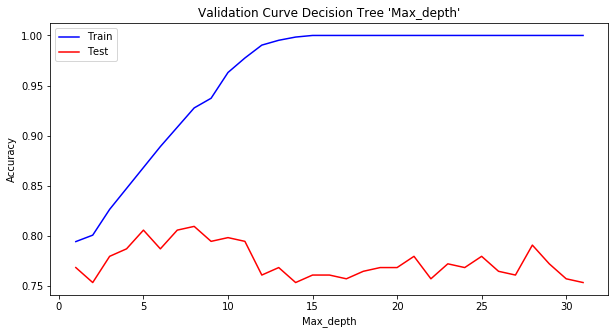

In [56]:
accur_train = []
accur_test = []

for i in range(1,32):
    accur_train_,accur_test_ = decisionTreeBasedOnMaxDepth(i)
    accur_train.append(accur_train_)
    accur_test.append(accur_test_)
    
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Validation Curve Decision Tree 'Max_depth'")
plt.plot(range(1,32),accur_train,color='b')
plt.plot(range(1,32),accur_test,color='r')
plt.legend(['Train','Test'])
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

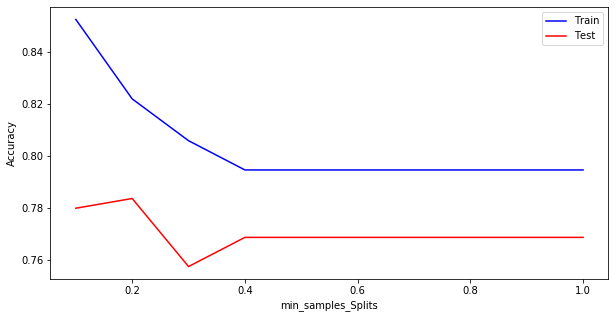

In [57]:
# min_Sample_split
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

accur_train = []
accur_test = []

for i in min_samples_splits:
    
    dt = DecisionTreeClassifier(min_samples_split= i)
    
    dt.fit(X_train,y_train)
    
    y_pred_train = dt.predict(X_train)
    y_pred_test = dt.predict(X_test)
    
    accur_train.append(accuracy_score(y_train,y_pred_train))
    accur_test.append(accuracy_score(y_test,y_pred_test))

plt.figure(figsize=(10,5))
plt.plot(min_samples_splits,accur_train,color='b')
plt.plot(min_samples_splits,accur_test,color='r')
plt.legend(['Train','Test'])
plt.xlabel("min_samples_Splits")
plt.ylabel("Accuracy")

In [58]:
# Lets USe Decision Tree using Randomized Search

maxdepth = list(np.linspace(1,32,32))
max_features = list(np.linspace(0,13,14))
max_sample_leaf = list(np.linspace(0.1,0.5,9))
min_samples_splits = np.linspace(0.1, 0.5, 10, endpoint=True)

param_list = { "criterion" :["gini","entropy"],
                "max_depth" : maxdepth,
                "max_features":max_features,
                "min_samples_leaf" : max_sample_leaf,
                "min_samples_split": min_samples_splits}

param_grid = {
    'max_depth': [x for x in range(1,32)],
    'max_features': [x for x in range(2,14)],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    "criterion" :["gini","entropy"],
    }

from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 6696 candidates, totalling 20088 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 4200 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 8728 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 14568 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 20088 out of 20088 | elapsed:  1.0min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=2)

In [62]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=26, max_features=2, min_samples_leaf=4,
                       min_samples_split=12)

In [63]:
classifer = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:
model = classifer.fit(X_train,y_train)

In [65]:
y_pred = model.predict(X_test)

In [66]:
# Computing Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,confusion_matrix
from sklearn.metrics import classification_report

In [67]:
accuracy_score(y_test,y_pred)

0.7761194029850746

In [68]:
recall_score(y_test,y_pred)

0.6696428571428571

In [69]:
precision_score(y_test,y_pred)

0.7653061224489796

In [70]:
confusion_matrix(y_test,y_pred)

array([[133,  23],
       [ 37,  75]], dtype=int64)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       156
           1       0.77      0.67      0.71       112

    accuracy                           0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

